In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
for dirname, _, filenames in os.walk('/home/pguser/Pictures/us-election'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/pguser/Pictures/us-election/county_facts_dictionary.csv
/home/pguser/Pictures/us-election/datapackage.json
/home/pguser/Pictures/us-election/us_county_level_presidential_results_12_16.csv
/home/pguser/Pictures/us-election/votes.csv
/home/pguser/Pictures/us-election/county_facts.csv


In [13]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [14]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [15]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [16]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# county_facts.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/home/pguser/Pictures/us-election/county_facts.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'county_facts.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 54 columns


In [7]:
df1.head(5)

,fips,area_name,state_abbreviation,pst045214,pst040210,pst120214,pop010210,age135214,age295214,age775214,...,sbo415207,sbo015207,man450207,wtn220207,rtn130207,rtn131207,afn120207,bps030214,lnd110210,pop060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


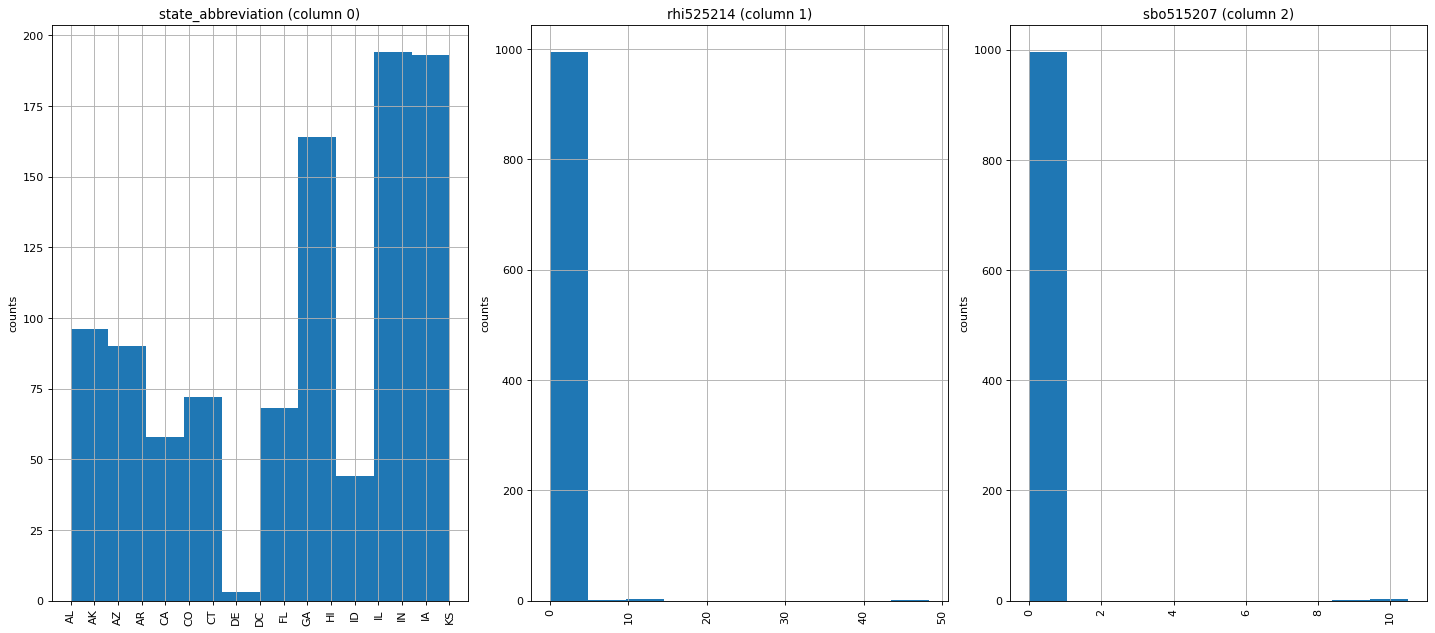

In [17]:
# Distribution graphs (histogram/bar graph) of sampled columns:
plotPerColumnDistribution(df1, 10, 5)

/tmp/ipykernel_3743/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


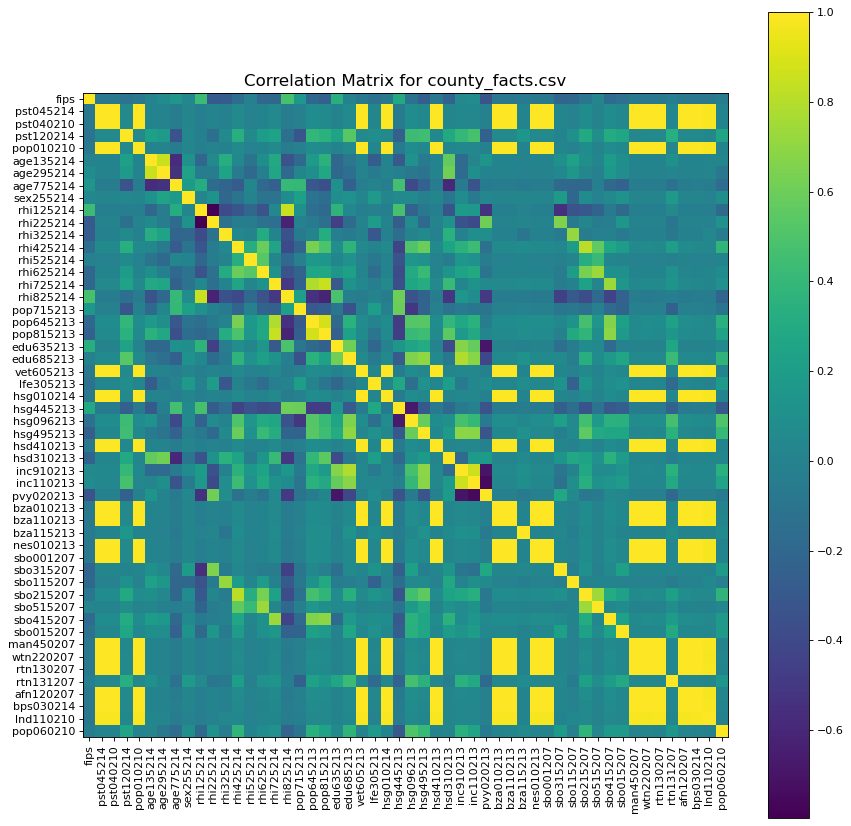

In [18]:
# Correlation matrix:
plotCorrelationMatrix(df1, 13)

/tmp/ipykernel_3743/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


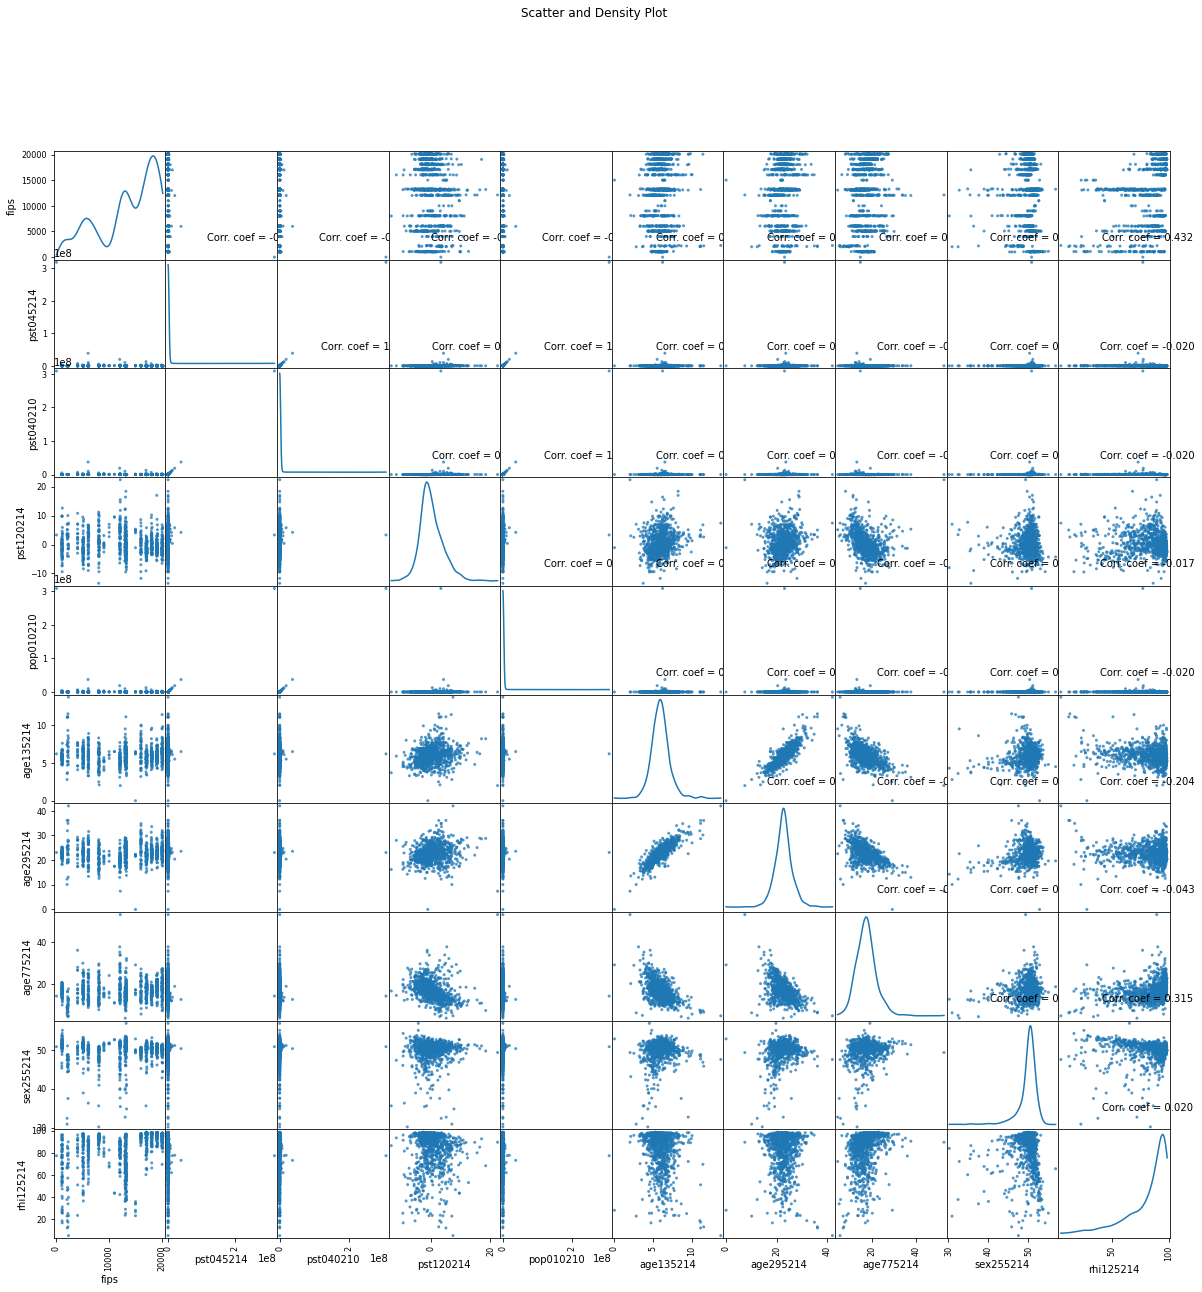

In [19]:
# Scatter and density plots:
plotScatterMatrix(df1, 20, 10)

In [20]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# county_facts_dictionary.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/home/pguser/Pictures/us-election/county_facts_dictionary.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'county_facts_dictionary.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 51 rows and 2 columns


In [21]:
df2.head(5)

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


In [22]:
# Distribution graphs (histogram/bar graph) of sampled columns:
plotPerColumnDistribution(df2, 10, 5)

<Figure size 2400x0 with 0 Axes>

In [23]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# us_county_level_presidential_results_12_16.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/home/pguser/Pictures/us-election/us_county_level_presidential_results_12_16.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'us_county_level_presidential_results_12_16.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 21 columns


In [24]:
df3.head(5)

,column_a,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,per_dem_2016,per_gop_2016,diff_2016,per_point_diff_2016,state_abbr,...,fips,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,per_dem_2012,per_gop_2012,diff_2012,per_point_diff_2012
0,0,2013,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2050,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2060,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


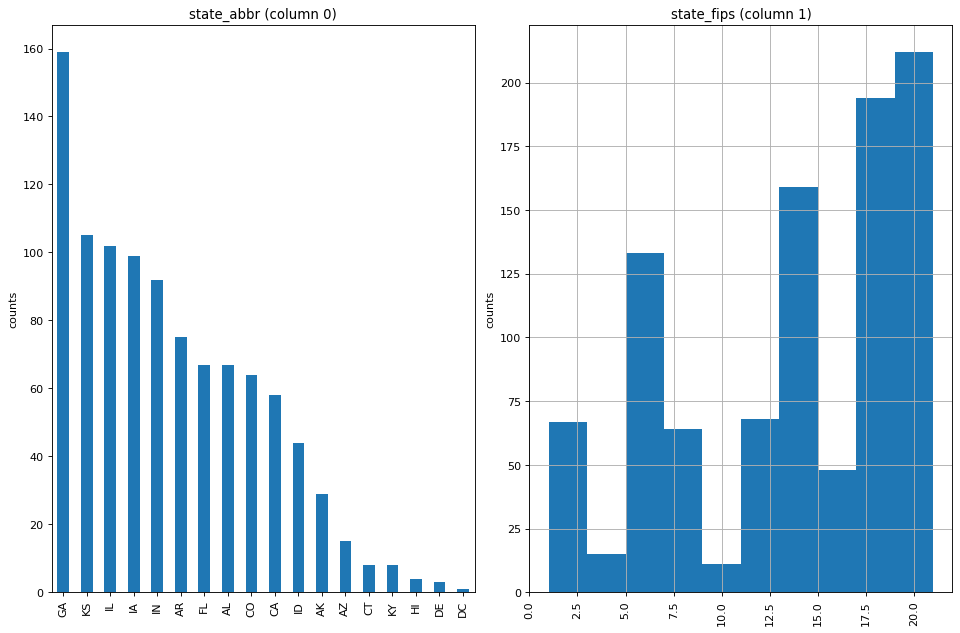

In [25]:
# Distribution graphs (histogram/bar graph) of sampled columns:
plotPerColumnDistribution(df3, 10, 5)

/tmp/ipykernel_3743/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


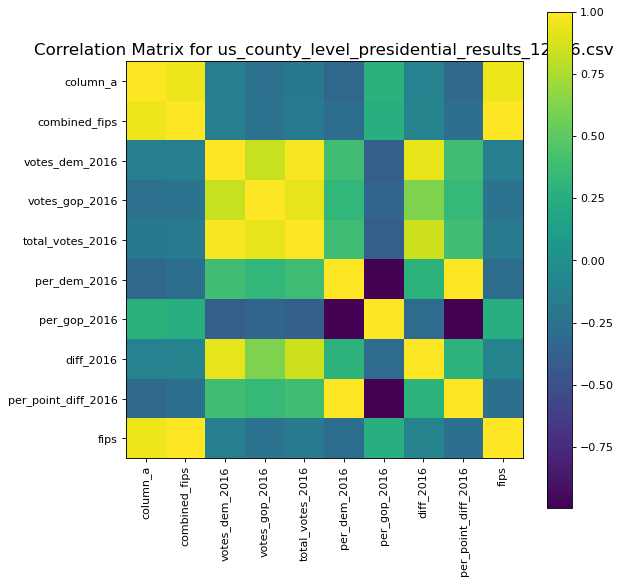

In [26]:
# Correlation matrix:
plotCorrelationMatrix(df3, 8)

/tmp/ipykernel_3743/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


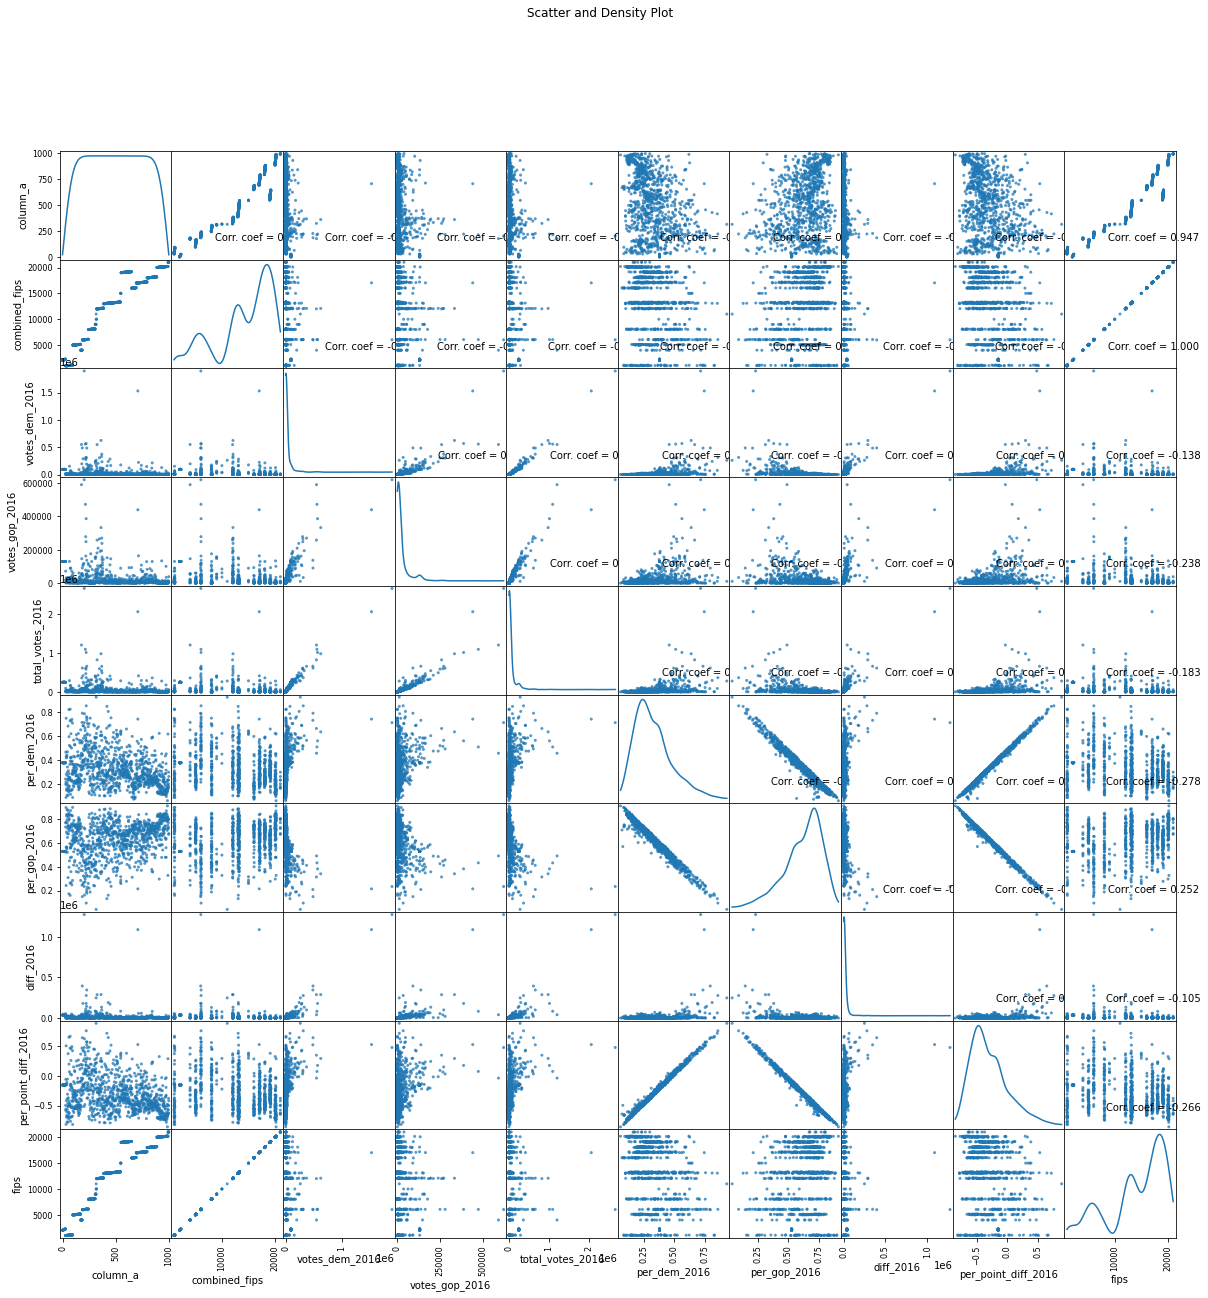

In [27]:
# Scatter and density plots:
plotScatterMatrix(df3, 20, 10)